### Predicting Heart Disease using Machine Learning
I'll go through  Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

My approach will be like as follows :
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given clinical parameters about a patient , we have to predict whether or not they have heart disease.

So the problem is **binary classification** problem(the result can be any of the the 2 classes)

## 2. Data
I took the data from kaggle : https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called features or independent variable) are the variables what we'll use to predict our **target variable**(also known as dependent variable).

> We use the independent variables to predict our dependent variable.

So here, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease. 

## 3. Evaluation 
The evaluation metric is something I define at the start of a project.

>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue this project.

## 4. Features 
Features are different parts of the data. During this step, we want to start finding out what we can do about the data.
## Heart Disease Data Dictionary
A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease):
1. age - age in years
2. sex - (1=male; 0=female)
3. cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
   * anything above 130-140 is typically cause of concern
5. chol - serum cholestoral in mg/dl
   * serum = LDL + HDL + .2* triglycerides
   * above 200 is cause of concern
6. fbs - (fasting blood sugar> 120 mg/dl) (1= true; 0= false)
   * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
   * 0: Nothing to note
   * 1: ST-T Wave abnormality
       * can range from mild symptoms to severe problems
       * signals non-normal heart beat
   * 2: Possible or definite left ventricular hypertrophy
       * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
We're going to use Pandas, Matplotlib and Numpy for Data Analysis and Manipulation

In [1]:
# Importing all the tools we need

# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
# Since plot_roc_curve was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" so we will import it as:
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape 

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Let's check how many of each class are there
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

So this is a relatively balanced problem meaning that we have a similar amount of examples in both classes(*Balanced Classification Problem*). An Unbalanced target column, meaning some classes have far more samples, can be harder to model than a balanced set.

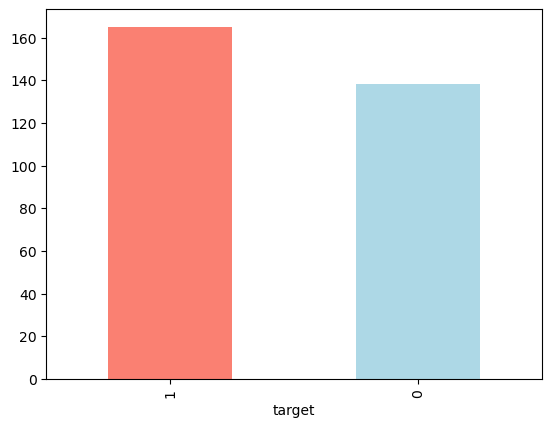

In [5]:
# Plotting the value counts with a bar graph
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"])
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


 `df.info()` shows a quick insight to the number of missing values you have and what type of data your working with.

In [7]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In our case, there are no missing values and all of our columns are numerical in nature.

Another way to get some quick insights on your dataframe is to use `df.describe()`. It shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Gender
If you want to compare two columns to each other, you can use the function `pd.crosstab(column_1, column_2)`.

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.

Let's compare our target column with the sex column.

Remember from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
# Let's compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


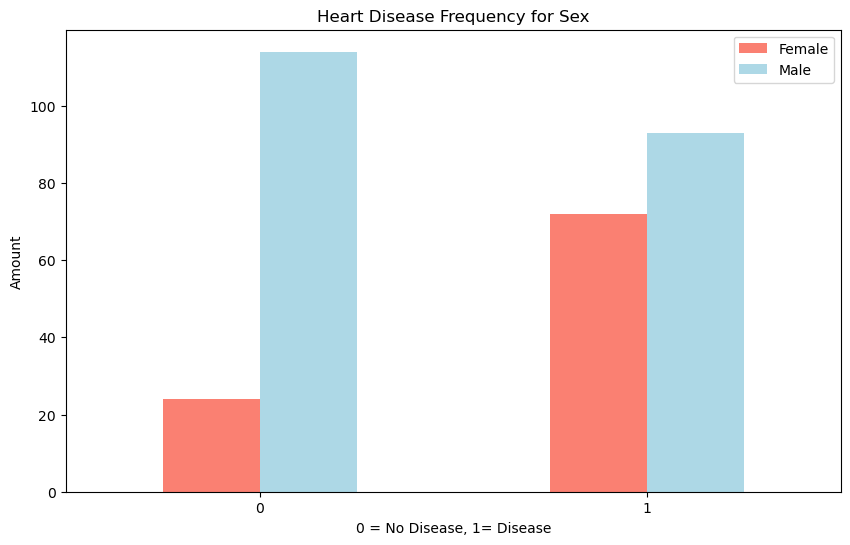

In [11]:
# Creating a plot of crosstab for visually understanding 
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

## Age vs. Max Heart Rate for Heart Disease

Let's try combining a couple of independent variables, such as, age and thalach (maximum heart rate) and then comparing them to our target variable heart disease.

Because there are so many different values for age and thalach, we'll use a scatter plot.

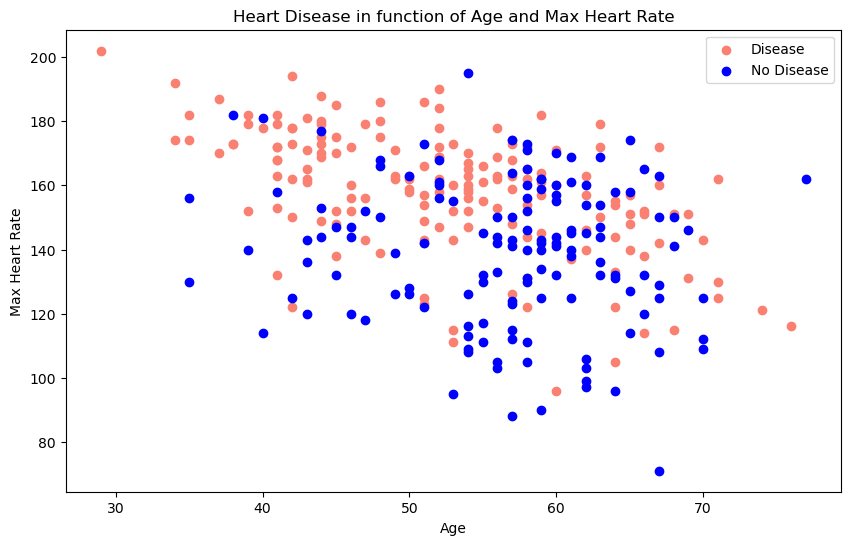

In [12]:
# Create another figure 
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='blue');

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

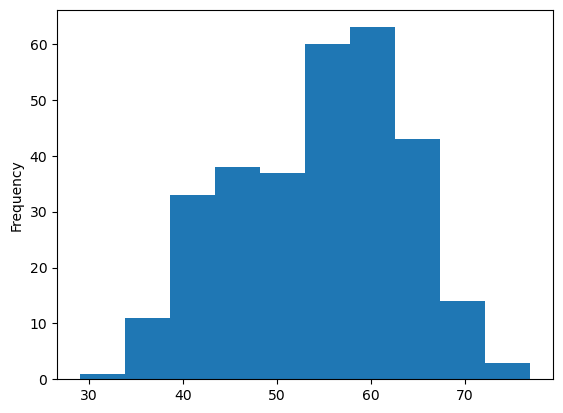

In [13]:
# Check the distribution of the age column with a histogram 
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain video 

3. cp - chest pain type

* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease


In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


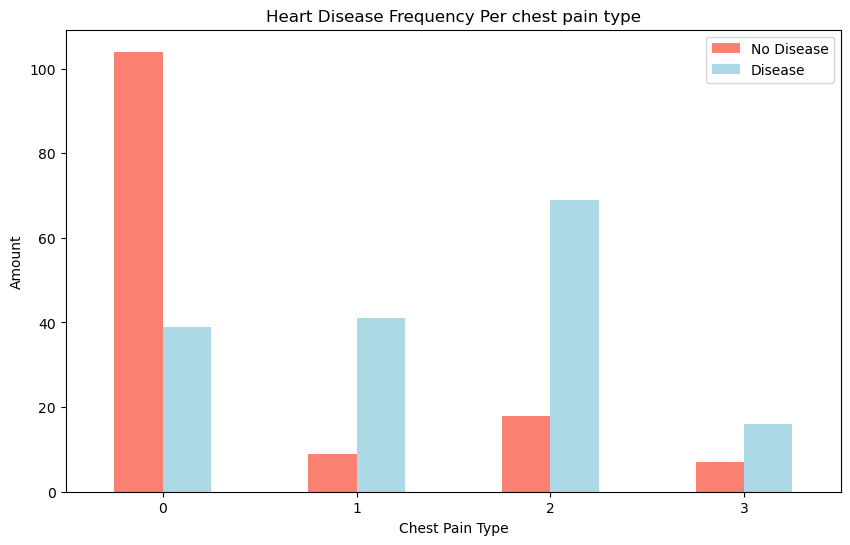

In [15]:
# making the crosstab visual
pd.crosstab(df.cp, df.target).plot(kind="bar",figsize=(10,6), color=["salmon","lightblue"])

plt.title("Heart Disease Frequency Per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Let's make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


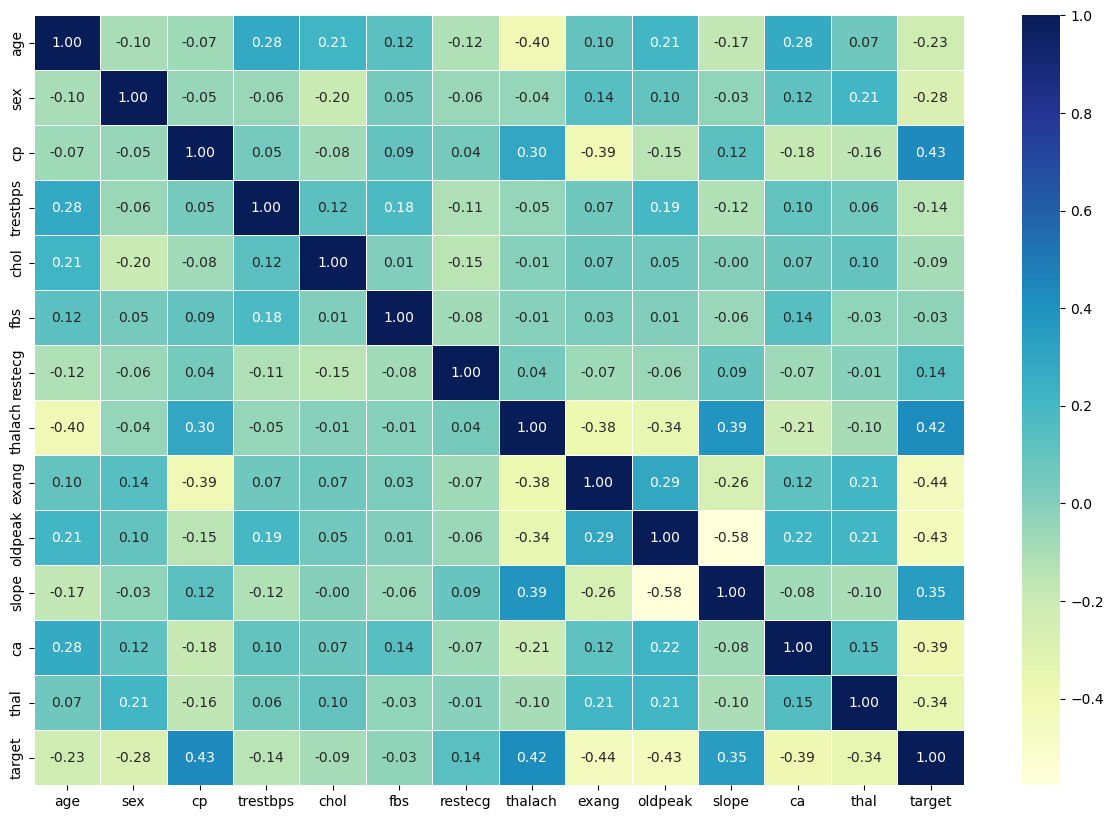

In [18]:
# Let's visualize our correlation matrix  
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
                annot= True,
               linewidth= 0.5,
               fmt= ".2f",
               cmap= "YlGnBu");

## 5. Modelling

We've explored the data, now we'll try to use machine learning to predict our target variable based on the 13 independent variables.

We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest

In [19]:
# Split the data into X and y
X = df.drop("target", axis=1)

y= df["target"]

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
#Spliting data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Model choices
Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()

In [23]:
# Put models in a dictionary
models = {"KNN" : KNeighborsClassifier(),
          "Logistic Regression" : LogisticRegression(),
          "Random forest" : RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [24]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\singh\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random forest': 0.8360655737704918}

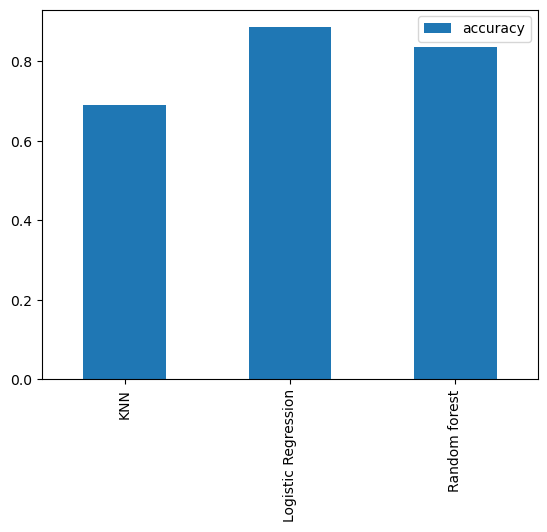

In [25]:
# Let's have a visual comparison of our models
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

We can see from the graphs that LogisticRegression() model performs the best

Some of the important terms for the data scientist are:

* Hyperparameter tuning - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* Feature importance - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* Cross-validation - Splits your dataset into multiple parts then train and tests your model on each part and evaluates performance as an average.
* Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* Recall - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.
* Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* ROC Curve - Receiver Operating Characteristic is a plot of true positive rate versus false positive rate.
* Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0

`so let's go to the further steps`

## Hyperparameter Tuning
*  Tuning K-nearest neighbors or (KNN) by hand
  
 `KNN works by assuming dots which are closer together belong to the same class. If n_neighbors=5 then it assume a dot with the 5 closest dots around it are in the same class.`

In [26]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different valuse for n neighbors
neighbors = range(1,21)

# setup knn instance 
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors =i)
    knn.fit(X_train, y_train)   # fitting the model
    # updating the training scores list 
    train_scores.append(knn.score(X_train, y_train))
    #updating the test scores list 
    test_scores.append(knn.score(X_test, y_test))

In [27]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum score on the knn data:  75.41%


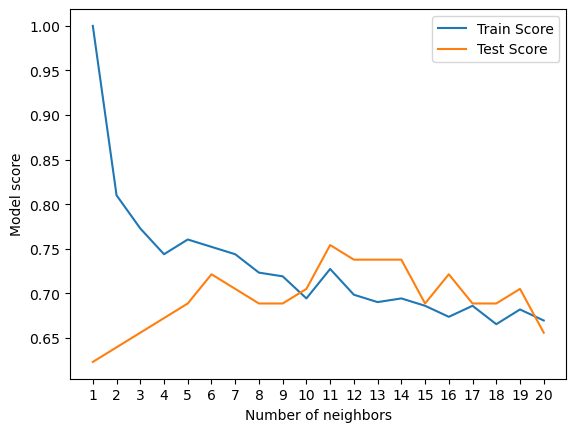

In [29]:
# Let's visualize on which value of n_neighbors what is the score:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label= "Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum score on the knn data: {max(test_scores)*100: .2f}%")

Even after doing this, the KNN model's performance didn't get near to LogisticRegression or the RandomForestClassifier .

Because of this, we'll discard KNN and focus on the other two.

Instead of us having to manually try different hyperparameters by hand, RandomizedSearchCV tries a number of different combinations, evaluates them and saves the best.

In [30]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth" : [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)
           }

Now let's use `RandomizedSearchCV` to try and tune our `LogisticRegression` model.

We'll pass it the different hyperparameters from `log_reg_grid` as well as set `n_iter = 20`. This means, `RandomizedSearchCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones.

In [31]:
# Setup the random seed
np.random.seed(42)

# Setup Random Hyperparameter search for Logistic Regression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter= 20,
                               verbose= True)

# Fit random hyperparameter search model 
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [33]:
 rs_log_reg.score(X_test, y_test)  

0.8852459016393442

Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [34]:
# Setup Random seed
np.random.seed(42)

# Setup Radnom hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv=5,
                          n_iter= 20,
                          verbose= True)

# Fit random Hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [35]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [36]:
# Evaluate the randomized search random forest classifier model
rs_rf.score(X_test, y_test)


0.8688524590163934


Tuning the hyperparameters for each model saw a slight performance boost in both the RandomForestClassifier and LogisticRegression.

## Tuning a model with `GridSearchCV`
The difference between `RandomizedSearchCV` and `GridSearchCV` is where `RandomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations, `GridSearchCV` will test every single possible combination.

In short:

* `RandomizedSearchCV` - tries `n_iter` combinations of hyperparameters and saves the best.
* `GridSearchCV` - tries every single combination of hyperparameters and saves the best.

In [37]:
# Different hyperparameters for Logistic Regression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}
# Setup grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                         cv = 5,
                         verbose= True)
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [38]:
# Check the best parameters 
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [39]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned ML classifier, beyond accuracy
* ROC curve and AUC score - RocCurveDisplay()
(Note: This was previously sklearn.metrics.plot_roc_curve(), as of Scikit-Learn version 1.2+, it is sklearn.metrics.RocCurveDisplay().)
* Confusion matrix - confusion_matrix()
* Classification report - classification_report()
* Precision - precision_score()
* Recall - recall_score()
* F1-score - f1_score()

Scikit-Learn has these all built-in

To access them, we'll have to use our model to make predictions on the test set. You can make predictions by calling `.predict()` on a trained model and passing it the data you'd like to predict on.

We'll make predictions on the test data.

In [40]:
# Make predictions on test data
y_preds = gs_log_reg.predict(X_test)

In [41]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

## ROC curve

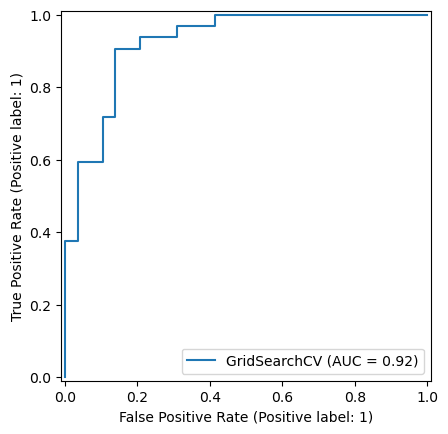

In [42]:
 # Plot ROC curve and  calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test, y_test);
# Since, RocCurveDisplay is a class, not a direct plotting function — it doesn’t take your model or data as positional arguments.

## Confusion Matrix

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using `confusion_matrix()` and passing it the true labels and predicted labels.

In [43]:
# print confusion matrix 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


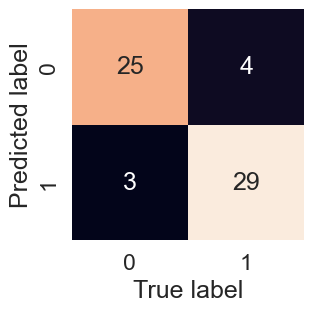

In [44]:
# making the confusion matrix visual
sns.set(font_scale =1.5)

def plot_con_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True, # Annotate the boxes
                    cbar= False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_con_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score. 

In [45]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [46]:
# check best hyperparameters 
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [47]:
# So now we'll create a new classifier with best parameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212, solver= "liblinear")

In [48]:
# cross- validated acccuracy score
cv_acc = cross_val_score(clf,
                        X, #we can pass entire X data now because we're using cross- validated score
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [49]:
# Now, since we've got 5 different valuse we're going to do average
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

Now,doing the same for other classification metrics.

In [50]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8215873015873015)

In [51]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

In [52]:
# cross-validated f1-score
cv_f1 = np.mean(cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="f1"))
cv_f1

np.float64(0.8705403543192143)

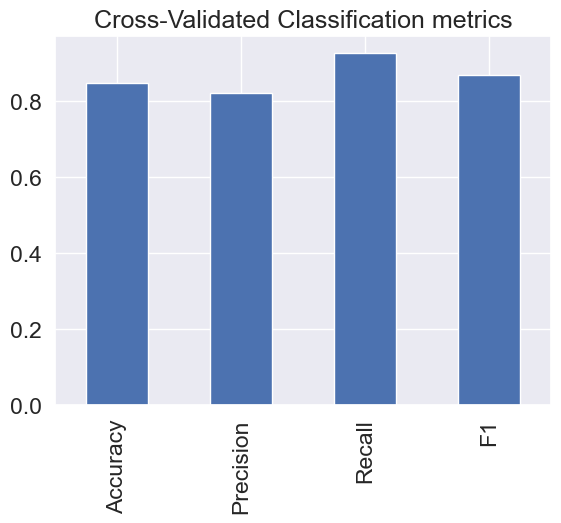

In [53]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                            "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Classification metrics", legend= False);

### Feature Importance 
Feature importance is like, "which features contributed most to the outcomes of the model and how did they contribute?"
finding feature importance is different for each machine learning model. One way is to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model.

In [55]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')
clf.fit(X_train, y_train);

In [56]:
 # check coef_
clf.coef_

array([[ 0.00369922, -0.90424093,  0.67472825, -0.0116134 , -0.00170364,
         0.04787688,  0.33490201,  0.02472938, -0.63120409, -0.57590965,
         0.47095149, -0.65165346, -0.69984211]])

In [57]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.003699221627279003),
 'sex': np.float64(-0.9042409285687546),
 'cp': np.float64(0.6747282509574564),
 'trestbps': np.float64(-0.01161340025062118),
 'chol': np.float64(-0.0017036437710376048),
 'fbs': np.float64(0.047876877336918186),
 'restecg': np.float64(0.33490200716536156),
 'thalach': np.float64(0.024729382362283066),
 'exang': np.float64(-0.6312040866990564),
 'oldpeak': np.float64(-0.5759096490530667),
 'slope': np.float64(0.47095148586396174),
 'ca': np.float64(-0.6516534633333719),
 'thal': np.float64(-0.6998421076294032)}

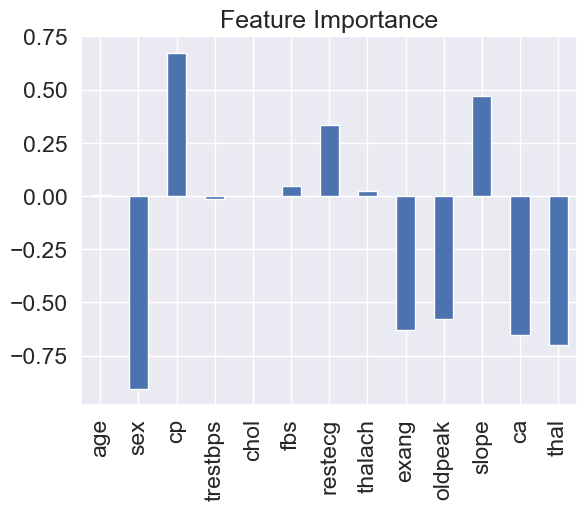

In [58]:
# Visualizing Feature importance
feature_df = pd.DataFrame(feature_dict,  index=[0])
feature_df.T.plot.bar(title= "Feature Importance", legend= False);

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.

We can see this by comparing the sex column to the target column.

In [60]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

In [61]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Since slope has positive coefficients that means if the slope increases target should also increase.

`What does this mean?`

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.